## Observations and Insights 

The testing was evenly distributed between male and female mice.  Tests were conducted using 10 different drugs, and allocation to these drugs was evenly distributed amongst the mice.

Based on the data provided, the two most promising drug treatments to reduce tumor volume are Capomulin and Ramicane.

With the drug treatments Infubinol and Ceftamin, the tumors got bigger with testing time.

There is a strong, positive correlation between average tumor volume and mouse weight (i.e. heavier mice have bigger tumors), for mice treated with Capomulin.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = pd.merge(mouse_metadata, study_results, how="inner", on = ["Mouse ID"])

# Display the data table for preview
mouse_results.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# quick look at files to determine if correct merge was used, look at data types etc
print(mouse_metadata.info())
print()
print(study_results.info())
print()
print(mouse_results.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Dat

In [3]:
# Checking the number of mice.
Number_mice = mouse_results["Mouse ID"].nunique()
Number_mice




249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_micedata = mouse_results.loc[mouse_results.duplicated(["Mouse ID", "Timepoint"])]





In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
print(duplicate_micedata)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_results = mouse_results.drop_duplicates(subset = ["Mouse ID", "Timepoint"], keep = 'first')

In [7]:
# Checking the number of mice in the clean DataFrame.
print(clean_mouse_results.info())
print()
print(clean_mouse_results["Mouse ID"].nunique())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1888 non-null   object 
 1   Drug Regimen        1888 non-null   object 
 2   Sex                 1888 non-null   object 
 3   Age_months          1888 non-null   int64  
 4   Weight (g)          1888 non-null   int64  
 5   Timepoint           1888 non-null   int64  
 6   Tumor Volume (mm3)  1888 non-null   float64
 7   Metastatic Sites    1888 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.8+ KB
None

249


## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

regimen = clean_mouse_results["Drug Regimen"].unique()

stats = pd.DataFrame()


for x in range(len(regimen)):
    
    data = clean_mouse_results.loc[clean_mouse_results["Drug Regimen"] == regimen[x]]["Tumor Volume (mm3)"]

    mean = np.mean(data)
    median = np.median(data)
    var = np.var(data, ddof = 0)
    stdev = np.std (data, ddof = 0)
    sem = st.sem(data)

    stats[x] = [regimen[x], mean, median, var, stdev, sem]

    

stats = stats.transpose().copy()
stats.columns = ['Drug Regimen', 'mean', 'median', 'var', 'stdev', 'sem']
stats.set_index('Drug Regimen')
stats = stats.sort_values('Drug Regimen')

stats



,Drug Regimen,mean,median,var,stdev,sem
1,Capomulin,40.6757,41.5578,24.8393,4.9839,0.329346
4,Ceftamin,52.5912,51.7762,39.0694,6.25056,0.469821
2,Infubinol,52.8848,51.8206,42.8864,6.54877,0.492236
7,Ketapril,55.2356,53.6987,68.1889,8.25766,0.60386
9,Naftisol,54.3316,52.5093,65.8177,8.11281,0.596466
3,Placebo,54.0336,52.2889,60.8301,7.79937,0.581331
8,Propriva,52.3935,50.91,42.8623,6.54693,0.525862
0,Ramicane,40.2167,40.6732,23.3837,4.83567,0.320955
5,Stelasyn,54.2331,52.4317,59.1221,7.68909,0.573111
6,Zoniferol,53.2365,51.8185,48.2667,6.94742,0.516398


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

tumor_regimen_all = clean_mouse_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

print(tumor_regimen_all)



                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

(-1.0, 10.0)

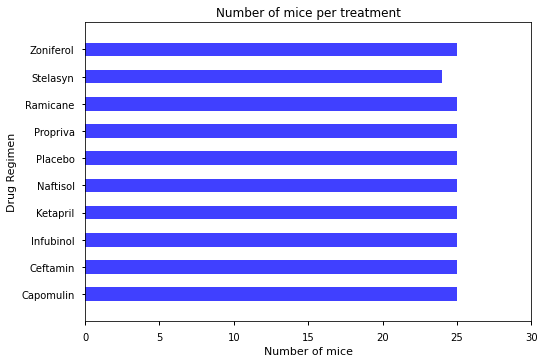

In [ ]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# collate data
treatments = clean_mouse_results.groupby(["Drug Regimen"])["Mouse ID"].nunique()

# plot titles
plot_title = ("Number of mice per treatment")

# create chart
treatment_chart = treatments.plot(kind = "barh", color = "blue", alpha = 0.75, title = plot_title)

# modify chart appearance
treatment_chart.set_xlabel("Number of mice")
treatment_chart.set_xlim(0, max(treatments)+5)
treatment_chart.set_ylim(-1,len(treatments))


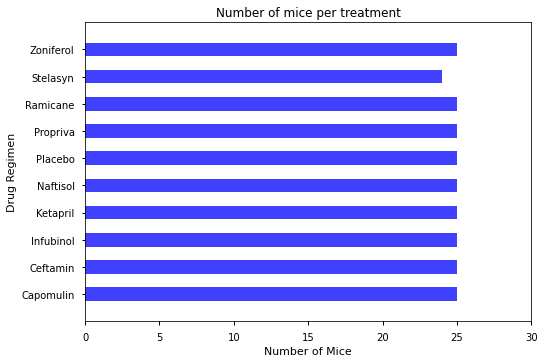

In [ ]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# use data from previous cell
plt.barh(treatments.index.tolist(), treatments, facecolor="blue", alpha=0.75, align="center", height = 0.5)

# add tick marks
y_axis = np.arange(0, len(treatments))
tick_locations = []
for y in y_axis:
    tick_locations.append(y)
plt.yticks(tick_locations, treatments.index.tolist())

# add titles and labels
plt.title("Number of mice per treatment")
plt.xlabel("Number of Mice")
plt.ylabel("Drug Regimen")

# modify x & y lims
plt.xlim(0, max(treatments)+5)
plt.ylim(-1,len(treatments) )

plt.show()


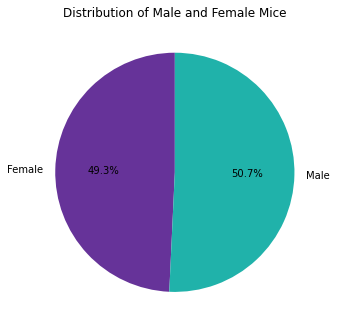

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# get data for plot
mf_dist = clean_mouse_results.groupby(["Sex"])["Mouse ID"].count()

# choose colours for female / male
colors = ["rebeccapurple", "lightseagreen"]

# add title
plot_title = ("Distribution of Male and Female Mice")

# draw pie plot
mf_chart = mf_dist.plot(kind = "pie", startangle = 90, colors = colors, autopct="%1.1f%%", title = plot_title)

# remove unnecessary ylabel
mf_chart.set_ylabel('')

mf_chart


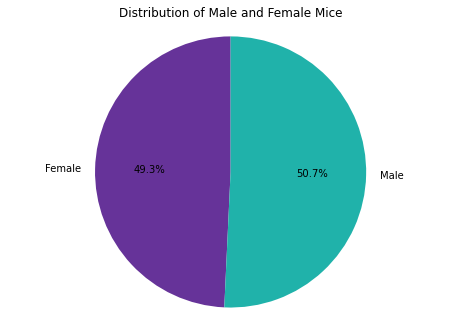

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["rebeccapurple", "lightseagreen"]
plt.pie(mf_dist, labels = mf_dist.index.tolist(), colors = colors, startangle = 90, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Distribution of Male and Female Mice")
plt.show()



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cric = clean_mouse_results.loc[clean_mouse_results["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

cric = cric.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=[True, True, True])
final_tumor_volume = cric.groupby(["Drug Regimen", "Mouse ID"])["Tumor Volume (mm3)"].last()
print(final_tumor_volume)


Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
                            ...    
Ramicane      s508        30.276232
              u196        40.667713
              w678        43.166373
              y449        44.183451
              z578        30.638696
Name: Tumor Volume (mm3), Length: 100, dtype: float64


In [ ]:
start = cric.loc[cric["Timepoint"] == 0]
start.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,100.000000,100.000000,100.0,100.0,100.0
mean,13.520000,23.710000,0.0,45.0,0.0
std,7.608448,4.472802,0.0,0.0,0.0
min,1.000000,15.000000,0.0,45.0,0.0
25%,7.000000,20.000000,0.0,45.0,0.0
50%,15.000000,25.000000,0.0,45.0,0.0
75%,20.000000,27.250000,0.0,45.0,0.0
max,24.000000,30.000000,0.0,45.0,0.0


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 
    # Locate the rows which contain mice on each drug and get the tumor volumes
      
    # add subset 
        
    # Determine outliers using upper and lower bounds


# split cric into 4 separate series
capo_final = final_tumor_volume["Capomulin"]
rami_final = final_tumor_volume["Ramicane"]
infu_final = final_tumor_volume["Infubinol"]
ceft_final = final_tumor_volume["Ceftamin"]

# calculate IQR and outliers for capo
quartiles = capo_final.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume for Capomulin is: {round(lowerq, 2)}  (mm3)")
print(f"The upper quartile of final tumor volume for Capomulin is: {round(upperq, 2)} (mm3)")
print(f"The interquartile range of final tumor volume for Capomulin is: {round(iqr, 2)} (mm3)")
print(f"The median of final tumor volume for Capomulin is: {round(quartiles[0.5], 2)} (mm3)")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound, 2)} could be outliers.")
print(f"Values above {round(upper_bound, 2)} could be outliers.")
print()

# calculate IQR and outliers for rami
quartiles = rami_final.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume for Ramicane is: {round(lowerq, 2)}  (mm3)")
print(f"The upper quartile of final tumor volume for Ramicane is: {round(upperq, 2)} (mm3)")
print(f"The interquartile range of final tumor volume for Ramicane is: {round(iqr, 2)} (mm3)")
print(f"The median of final tumor volume for Ramicane is: {round(quartiles[0.5], 2)} (mm3)")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound, 2)} could be outliers.")
print(f"Values above {round(upper_bound, 2)} could be outliers.")
print()

# calculate IQR and outliers for infu
quartiles = infu_final.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume for Infubinol is: {round(lowerq, 2)}  (mm3)")
print(f"The upper quartile of final tumor volume for Infubinol is: {round(upperq, 2)} (mm3)")
print(f"The interquartile range of final tumor volume for Infubinol is: {round(iqr, 2)} (mm3)")
print(f"The median of final tumor volume for Infubinol is: {round(quartiles[0.5], 2)} (mm3)")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound, 2)} could be outliers.")
print(f"Values above {round(upper_bound, 2)} could be outliers.")
print()

# calculate IQR and outliers for ceft
quartiles = ceft_final.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume for Ceftamin is: {round(lowerq, 2)}  (mm3)")
print(f"The upper quartile of final tumor volume for Ceftamin is: {round(upperq, 2)} (mm3)")
print(f"The interquartile range of final tumor volume for Ceftamin is: {round(iqr, 2)} (mm3)")
print(f"The median of final tumor volume for Ceftamin is: {round(quartiles[0.5], 2)} (mm3)")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound, 2)} could be outliers.")
print(f"Values above {round(upper_bound, 2)} could be outliers.")
print()

The lower quartile of final tumor volume for Capomulin is: 32.38  (mm3)
The upper quartile of final tumor volume for Capomulin is: 40.16 (mm3)
The interquartile range of final tumor volume for Capomulin is: 7.78 (mm3)
The median of final tumor volume for Capomulin is: 38.13 (mm3)
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.

The lower quartile of final tumor volume for Ramicane is: 31.56  (mm3)
The upper quartile of final tumor volume for Ramicane is: 40.66 (mm3)
The interquartile range of final tumor volume for Ramicane is: 9.1 (mm3)
The median of final tumor volume for Ramicane is: 36.56 (mm3)
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.

The lower quartile of final tumor volume for Infubinol is: 54.05  (mm3)
The upper quartile of final tumor volume for Infubinol is: 65.53 (mm3)
The interquartile range of final tumor volume for Infubinol is: 11.48 (mm3)
The median of final tumor volume for Infubinol is: 60.17 (mm3)
Values b

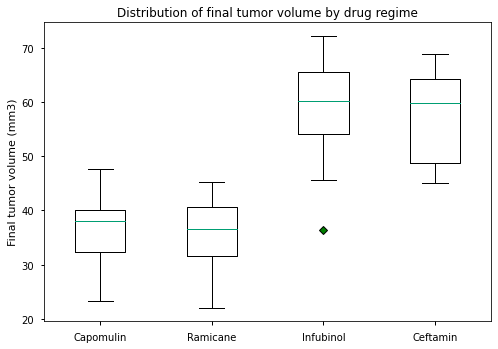

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()

green_diamond = dict(markerfacecolor='g', marker='D')

ax.boxplot([capo_final, rami_final, infu_final, ceft_final], flierprops = green_diamond)

ax.set_title("Distribution of final tumor volume by drug regime")
ax.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
ax.set_ylabel("Final tumor volume (mm3)")

plt.style.use("seaborn-notebook")

plt.show()



## Line and Scatter Plots

In [ ]:
# get data for mice treated with Capomulin
capo_results = clean_mouse_results.loc[mouse_results["Drug Regimen"] == "Capomulin"]

print(capo_results["Mouse ID"].unique())

# Choose mouse b742
capo_results_b742 = capo_results.loc[capo_results["Mouse ID"] == 'b742']



['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']


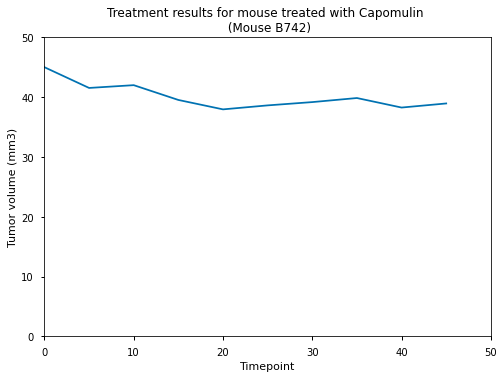

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
fig, ax = plt.subplots()
ax.plot(capo_results_b742["Timepoint"], capo_results_b742["Tumor Volume (mm3)"])

# add titles
ax.set_title("Treatment results for mouse treated with Capomulin \n (Mouse B742)")
ax.set_xlabel("Timepoint")
ax.set_ylabel("Tumor volume (mm3)")
ax.set_xlim(0, capo_results_b742["Timepoint"].max() + 5 )
ax.set_ylim(0, capo_results_b742["Tumor Volume (mm3)"].max() + 5)

plt.style.use("seaborn-notebook")

plt.show()


The correlation between Tumor Volume and time is (-0.9982556527550139, 4.042038712875181e-11)


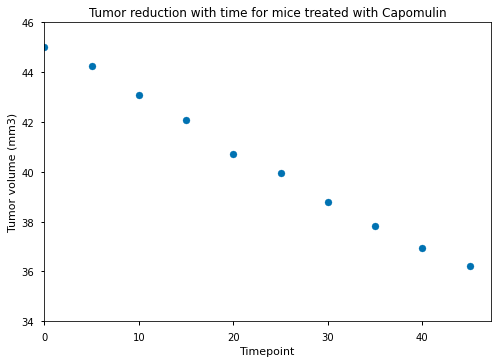

In [ ]:
# Generate a plot of average tumor volume versus timepoint for the Capomulin regimen, for all mice

# get data
capo_avg_vol = capo_results.groupby("Timepoint")["Tumor Volume (mm3)"].mean()

x_axis = capo_avg_vol.index.tolist()

# create chart
fig, ax = plt.subplots()

ax.scatter(x_axis, capo_avg_vol)
ax.set_title("Tumor reduction with time for mice treated with Capomulin")
ax.set_xlabel("Timepoint")
ax.set_ylabel("Tumor volume (mm3)")
ax.set_xlim(0)
ax.set_ylim(34, 46)

plt.style.use("seaborn-notebook")

correlation = st.pearsonr(x_axis,capo_avg_vol)
print(f"The correlation between Tumor Volume and time is {correlation}")


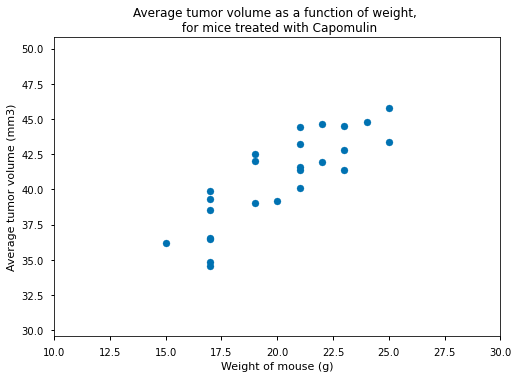

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# get average tumor volumes in a dataframe
capo_avg_vol_byID = capo_results.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capo_avg_vol_byID = capo_avg_vol_byID.rename("Average_tumor_vol")
capo_avg_vol_byID = pd.DataFrame(capo_avg_vol_byID)

# merge this with mouse metadata to match up with mouse weight
vol_by_weight = pd.merge(capo_avg_vol_byID, mouse_metadata, how="left", on = ["Mouse ID"])

# create chart
fig, ax = plt.subplots()

ax.scatter(vol_by_weight["Weight (g)"], vol_by_weight["Average_tumor_vol"])

ax.set_title("Average tumor volume as a function of weight, \n for mice treated with Capomulin")
ax.set_xlabel("Weight of mouse (g)")
ax.set_ylabel("Average tumor volume (mm3)")
ax.set_xlim(vol_by_weight["Weight (g)"].min() - 5, vol_by_weight["Weight (g)"].max() + 5 )
ax.set_ylim(vol_by_weight["Average_tumor_vol"].min() -5, vol_by_weight["Average_tumor_vol"].max() + 5)

plt.style.use("seaborn-notebook")

## Correlation and Regression

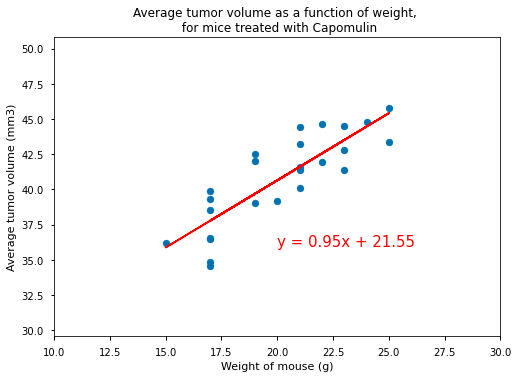

The correlation between both mouse weight and tumor volume is 0.84.


In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Add the linear regression equation and line to plot
x_values = vol_by_weight["Weight (g)"]
y_values = vol_by_weight["Average_tumor_vol"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig, ax = plt.subplots()

ax.scatter(x_values,y_values)
ax.plot(x_values,regress_values,"r-")

ax.annotate(line_eq,(20,36),fontsize=15,color="red")

ax.set_title("Average tumor volume as a function of weight, \n for mice treated with Capomulin")
ax.set_xlabel("Weight of mouse (g)")
ax.set_ylabel("Average tumor volume (mm3)")
ax.set_xlim(vol_by_weight["Weight (g)"].min() - 5, vol_by_weight["Weight (g)"].max() + 5 )
ax.set_ylim(vol_by_weight["Average_tumor_vol"].min() -5, vol_by_weight["Average_tumor_vol"].max() + 5)

plt.style.use("seaborn-notebook")

plt.show()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both mouse weight and tumor volume is {round(correlation[0],2)}.")
